In [4]:
# description at https://archive.ics.uci.edu/ml/datasets/automobile
# data at https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 99

In [5]:
col_names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width',
             'height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=col_names, na_values='?' )

In [6]:
cars.head(4)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [8]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
# taking continuous values features as numeric only from https://archive.ics.uci.edu/ml/datasets/automobile

target = 'price'
numeric_features = ['normalized_losses','wheel_base','length','width',
                    'height','curb_weight','engine_size','bore','stroke',
                    'compression_ratio','horsepower','peak_rpm',
                    'city_mpg','highway_mpg', 'price']

parameters = ['symboling','normalized_losses','make','fuel_type',
              'aspiration','num_doors','body_style','drive_wheels',
              'engine_location','length','width','height',
              'curb_weight','engine_type','num_cylinders',
              'engine_size','fuel_system','bore','stroke',
              'compression_ratio','horsepower','peak_rpm','city_mpg',
              'highway_mpg']

In [10]:
numeric_cars = cars.loc[:,numeric_features]

In [11]:
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [12]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(4)
memory usage: 24.1 KB


In [13]:
# dropping rows where price is null as price is the target
numeric_cars.dropna(subset=['price'], inplace=True)
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [14]:
# fill Nan with means in other columns
numeric_cars.drop('normalized_losses', axis='columns', inplace=True)

numeric_cars.fillna(cars.mean(), inplace=True)
numeric_cars.isnull().sum()

wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [15]:
# lets normalise all features so all values are between 0 and 1except 'price'
# 𝑧𝑖=𝑥𝑖−min(𝑥)/max(𝑥)−min(𝑥)

norm_numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
norm_numeric_cars['price'] = numeric_cars['price']
norm_numeric_cars.head(2)

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,16500.0


## Univariate Model

#### with default K

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df, features, target):
    
    np.random.seed(1)
    
    # randomising index to remove bais of dataset order
    df.reindex(np.random.permutation(df.index))
    
    # splitting dataset into half for train and test data sets
    df_train = df.iloc[0:round(len(df)/2)]
    df_test = df.iloc[round(len(df)/2):]
    
    # initialising model
    knn = KNeighborsRegressor()
    # fitting model
    knn.fit(df_train[features], df_train[target])
    # using model to predit target
    predicted = knn.predict(df_test[features])
    # calculating Root Mean Squared Value
    RMSE = mean_squared_error(df_test[target], predicted)**0.5
    
    return RMSE


In [17]:
# Running Function for all features
RMSE_dict = {} 

for parameter in norm_numeric_cars.columns.tolist():
    if parameter != target:
        RMSE_dict[parameter] = knn_train_test(norm_numeric_cars, [parameter],'price')

# making series for clearer viewing
pd.Series(RMSE_dict)

bore                 13408.016741
city_mpg              4814.778015
compression_ratio     8096.301512
curb_weight           5166.828581
engine_size           4190.433888
height               10839.693636
highway_mpg           4628.793094
horsepower            4267.730361
length                8304.189346
peak_rpm              9759.209970
stroke                9334.714914
wheel_base            9969.243292
width                 7110.412630
dtype: float64

#### With Grid Search option for K

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df, features, target, k_lst=[1,3,5,7,9]):
    
    np.random.seed(1)
    
    # randomising index to remove bais of dataset order
    df.reindex(np.random.permutation(df.index))
    
    # splitting dataset into half for train and test data sets
    df_train = df.iloc[0:round(len(df)/2)]
    df_test = df.iloc[round(len(df)/2):]
    
    RMSE_dict = {}
    
    # running through all K options
    for k in k_lst:
        # initialising model
        knn = KNeighborsRegressor(n_neighbors=k)
        # fitting model
        knn.fit(df_train[features], df_train[target])
        # using model to predit target
        predicted = knn.predict(df_test[features])
        # calculating Root Mean Squared Value
        RMSE_dict[k] = mean_squared_error(df_test[target], predicted)**0.5
    
    return RMSE_dict

In [19]:
# Running Function for all features
RMSE_dict = {} 

for parameter in norm_numeric_cars.columns.tolist():
    if parameter != target:
        RMSE_dict[parameter] = knn_train_test(norm_numeric_cars, [parameter],'price')

# making series for clearer viewing
RMSE_df = pd.DataFrame(RMSE_dict)
RMSE_df

,bore,city_mpg,compression_ratio,curb_weight,engine_size,height,highway_mpg,horsepower,length,peak_rpm,stroke,wheel_base,width
1,16502.751630,5347.150262,8085.605142,6566.749175,5338.791820,13032.276290,5188.333470,7027.606971,10053.579064,10914.812293,10925.953215,8052.050207,8044.144446
3,13941.384916,5210.261130,8137.969726,5635.184748,4698.501673,11411.019683,4655.081482,5400.929793,8230.050249,11280.739834,11848.331672,9171.153879,7234.558219
5,13408.016741,4814.778015,8096.301512,5166.828581,4190.433888,10839.693636,4628.793094,4267.730361,8304.189346,9759.209970,9334.714914,9969.243292,7110.412630
7,11114.586486,4575.950005,7896.692871,5239.631251,4114.571308,10041.327944,4112.387803,3821.376566,8483.928914,9392.829861,8255.343110,8938.808809,6621.848358
9,10199.413323,4770.344179,7823.115529,5244.555564,4056.629360,9313.330965,4029.962271,3461.132024,7655.123044,9423.925545,7516.859170,8637.304386,6531.417638


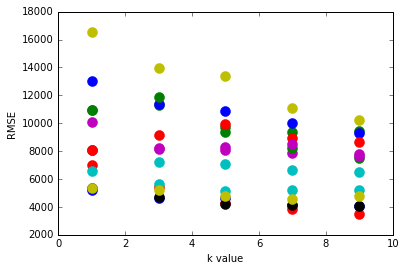

In [21]:
for k,v in RMSE_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, linestyle='none', marker='.', markersize=20)
    # plt.legend(loc='lower right')
    plt.xlim([0,10])
    plt.xlabel('k value')
    plt.ylabel('RMSE')


## Multivariate

In [22]:
# Taking avg RSME from univariate model run for each feature to sort 
# by best feature
# will use top features in the multivariate model run

RMSE_Means = RMSE_df.mean().sort_values()
RMSE_Means.index[0:2].tolist()

['engine_size', 'highway_mpg']

In [87]:
two_var_RMSE = knn_train_test(
    norm_numeric_cars, 
    RMSE_Means.index[0:2].tolist(),
    'price',
    k_lst=[5]
)
print(two_var_RMSE)

three_var_RMSE = knn_train_test(
    norm_numeric_cars, 
    RMSE_Means.index[0:3].tolist(),
    'price',
    k_lst=[5]
)
print(three_var_RMSE)

four_var_RMSE = knn_train_test(
    norm_numeric_cars, 
    RMSE_Means.index[0:4].tolist(),
    'price',
    k_lst=[5]
)
print(four_var_RMSE)

five_var_RMSE = knn_train_test(
    norm_numeric_cars, 
    RMSE_Means.index[0:5].tolist(),
    'price',
    k_lst=[5]
)
print(five_var_RMSE)

{5: 4350.739368552121}
{5: 3553.981440358945}
{5: 3545.4024213768666}
{5: 3869.425714853856}


### Grid search for hyperparameter

The results from above show using top 3, 4 and 5 features are giving a lower RMSE then using just top 2 features. Will run grid search for just those 3 combination of features

Running model for with three top features

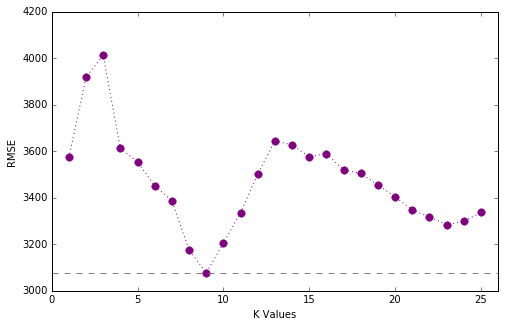

In [88]:
# 3 features

K_lst = list(range(1,26))
    
three_var_RMSE = knn_train_test(
    norm_numeric_cars, 
    RMSE_Means.index[0:3].tolist(),
    'price',
    k_lst=K_lst
)
three = pd.Series(three_var_RMSE)
three.plot(linestyle='dotted',
           marker='.', 
           markersize=15,
           c='purple',
          figsize=(8,5))
plt.xlim([0,26])
plt.xlabel('K Values')
plt.axhline(three.min(),color='gray',linestyle='dashed')
plt.ylabel('RMSE')
plt.show()

Running model for with four top features

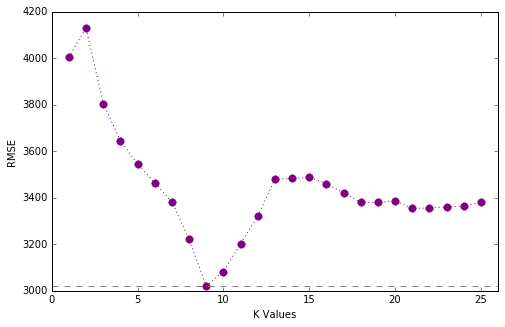

In [89]:
# 4 features

K_lst = list(range(1,26))
    
three_var_RMSE = knn_train_test(
    norm_numeric_cars, 
    RMSE_Means.index[0:4].tolist(),
    'price',
    k_lst=K_lst
)
four = pd.Series(three_var_RMSE)
four.plot(linestyle='dotted',
           marker='.', 
           markersize=15,
           c='purple',
          figsize=(8,5))
plt.xlim([0,26])
plt.xlabel('K Values')
plt.axhline(four.min(),color='gray',linestyle='dashed')
plt.ylabel('RMSE')
plt.show()

Running model for with five top features

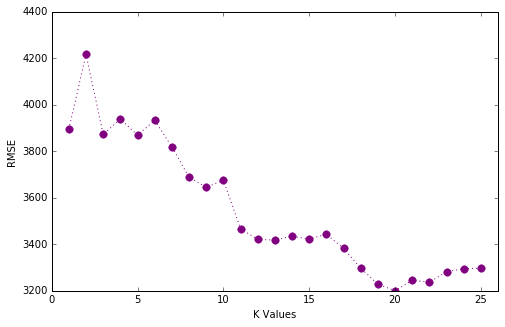

In [90]:
# 5 features

K_lst = list(range(1,26))
    
three_var_RMSE = knn_train_test(
    norm_numeric_cars, 
    RMSE_Means.index[0:5].tolist(),
    'price',
    k_lst=K_lst
)
five = pd.Series(three_var_RMSE)
five.plot(linestyle='dotted',
           marker='.', 
           markersize=15,
           c='purple',
          figsize=(8,5))
plt.xlim([0,26])
plt.xlabel('K Values')
plt.axhline(five.min(),color='gray',linestyle='dashed')
plt.ylabel('RMSE')
plt.show()

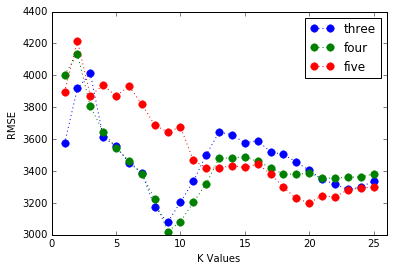

In [91]:
label_lst = ['three', 'four', 'five']

for i, v in enumerate([three, four, five]):
    x = list(v.index)
    y = list(v.values)
    plt.plot(
               x,
               y,
               linestyle='dotted',
               marker='.', 
               markersize=15,
               label=label_lst[i]
              )
plt.legend()
plt.xlim([0,26])
plt.xlabel('K Values')
# plt.axhline(three.min(),color='gray',linestyle='dashed')
plt.ylabel('RMSE')
plt.show()

From this we can clearly we that running the model with the Top 4 feature and K set at 9 is giving the lowest RMSE. You can also see that running the model with just the top 3 features is also giving an RMSE value very close to the RMSE value of the 